<a href="https://colab.research.google.com/github/rajeshsingh123/Amazon_User_Segmentaion/blob/main/Amazon_User_Segmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset = pd.read_csv('Amazon.com Clusturing Model.csv')
dataset.head()

,s,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [3]:
X = dataset.iloc[:, [2, 4]].values
print(X)

[[ 23  44]
 [ 26  91]
 [ 24   7]
 [ 28  87]
 [ 38  45]
 [ 27  86]
 [ 42   7]
 [ 28 106]
 [ 77   4]
 [ 36  81]
 [ 81  16]
 [ 42 111]
 [ 70  17]
 [ 29  87]
 [ 45  15]
 [ 27  89]
 [ 42  40]
 [ 24  74]
 [ 63  33]
 [ 42 110]
 [ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 82  62]

## Optimal number of clusters via Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

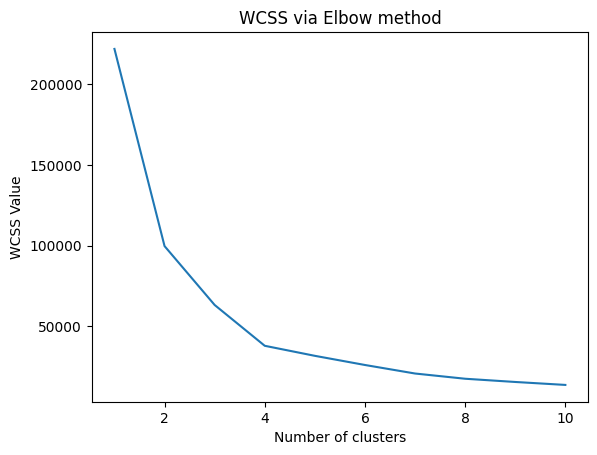

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

## K Means Model Training on Training set

In [5]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=42)
y_means=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
print(y_means)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


## Visualizing Clusters

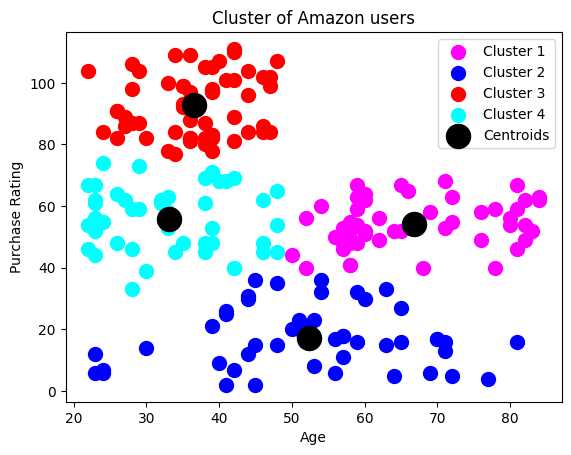

In [7]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

In [8]:
dataset.head()

,s,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [9]:
#lets now do clustering for income and rating
X=dataset.iloc[: ,3:5].values
print(X)

[[ 306555      44]
 [ 306555      91]
 [ 326992       7]
 [ 326992      87]
 [ 347429      45]
 [ 347429      86]
 [ 367866       7]
 [ 367866     106]
 [ 388303       4]
 [ 388303      81]
 [ 388303      16]
 [ 388303     111]
 [ 408740      17]
 [ 408740      87]
 [ 408740      15]
 [ 408740      89]
 [ 429177      40]
 [ 429177      74]
 [ 470051      33]
 [ 470051     110]
 [ 490488      40]
 [ 490488      82]
 [ 510925       6]
 [ 510925      82]
 [ 572236      16]
 [ 572236      92]
 [ 572236      36]
 [ 572236      69]
 [ 592673      35]
 [ 592673      98]
 [ 613110       5]
 [ 613110      82]
 [ 674421       5]
 [ 674421     104]
 [ 674421      16]
 [ 674421      91]
 [ 694858      20]
 [ 694858      82]
 [ 756169      30]
 [ 756169      84]
 [ 776606      40]
 [ 776606     104]
 [ 797043      41]
 [ 797043      69]
 [ 797043      32]
 [ 797043      73]
 [ 817480      62]
 [ 817480      53]
 [ 817480      48]
 [ 817480      48]
 [ 858354      59]
 [ 858354      68]
 [ 878791   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

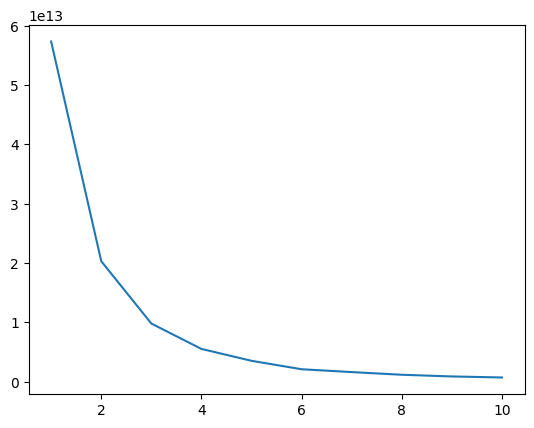

In [10]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.show()

In [11]:
# So from above graph we can see the elbow is at 4 SO we will select n=4 for our clustering
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
print(y_means)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


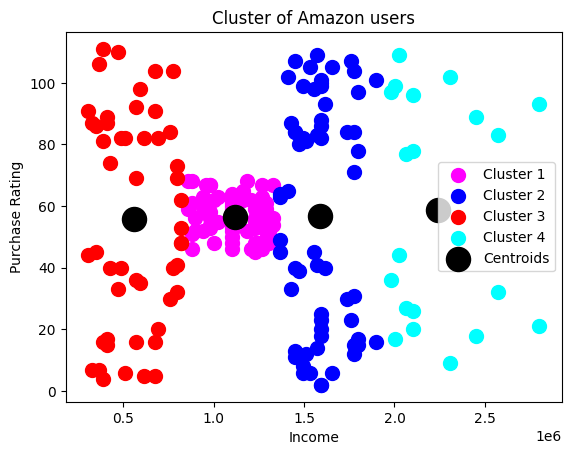

In [13]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Income')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

In [14]:
dataset.head()

,s,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45
